In [ ]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# analyze data

In [ ]:
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")
print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 19.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1"
print(os.listdir(dataset_path))

['gld_price_data.csv']


In [ ]:
file_path = f"{path}/gld_price_data.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = df.select_dtypes(include=['number']).corr()

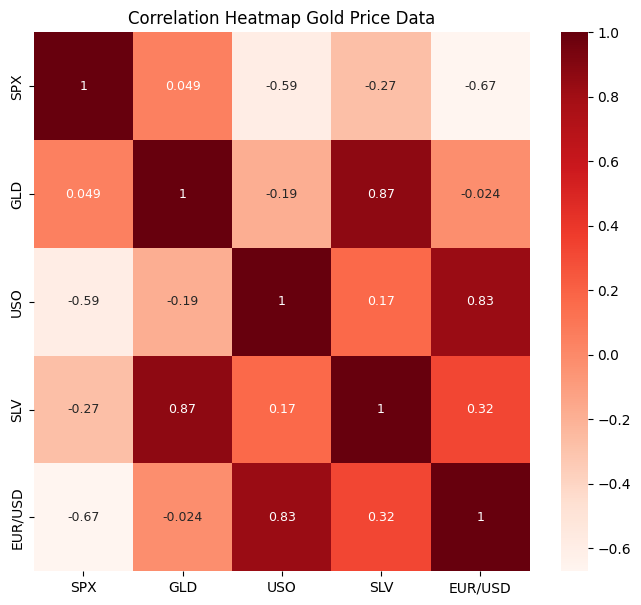

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(correlation, annot=True, cmap='Reds', annot_kws={'size':9})
plt.title('Correlation Heatmap Gold Price Data')
plt.show()
plt

<Axes: xlabel='GLD', ylabel='Density'>

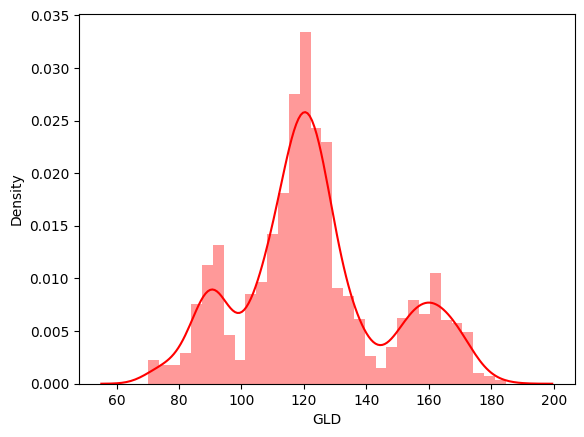

In [ ]:
sns.distplot(df['GLD'], color='red')

# splitting the features and target

In [ ]:
X = df.drop(['Date', 'GLD'], axis=1)
Y = df['GLD']

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   USO      2290 non-null   float64
 2   SLV      2290 non-null   float64
 3   EUR/USD  2290 non-null   float64
dtypes: float64(4)
memory usage: 71.7 KB
None


In [ ]:
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2290 entries, 0 to 2289
Series name: GLD
Non-Null Count  Dtype  
--------------  -----  
2290 non-null   float64
dtypes: float64(1)
memory usage: 18.0 KB
None


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=48)

# Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# model evaluation

In [ ]:
test_prediction = regressor.predict(X_test)
test_prediction

array([116.72359987, 120.7418996 , 128.56149923, 115.76980021,
       123.02149921, 132.61600379, 121.66400003, 127.57180109,
       118.66890102, 111.82860118, 107.48340104, 109.36549896,
       122.39763769, 120.01060073, 120.22790058, 147.43029892,
       154.21950187, 115.62120069, 161.95569709, 125.13330121,
       110.5091988 , 108.51929889, 117.29010127, 153.86440002,
       109.09659852, 164.58030094,  89.02310081, 102.01949933,
       117.14979958, 115.28730097, 108.92010021, 116.41390039,
       120.27499937, 125.20719992,  91.6242004 , 125.84160001,
        90.00009979, 152.97489852, 117.58579908, 161.97460099,
       114.9839991 , 120.61100065, 119.29100007, 160.08049934,
       156.37810069,  89.69569989, 168.4228969 , 148.64759878,
       126.32009932, 110.5884991 , 123.46529922, 175.40809832,
        87.1839992 , 109.19999808, 101.90659981, 154.61319884,
       108.81579989, 104.06849999,  92.84799927, 116.08570082,
       126.78379874, 110.05079884, 111.3271001 , 126.52

In [ ]:
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error: ", error_score)

R squared error:  0.9886291504319079


compare the actual value and predicted value in plot

In [ ]:
Y_test = list(Y_test)

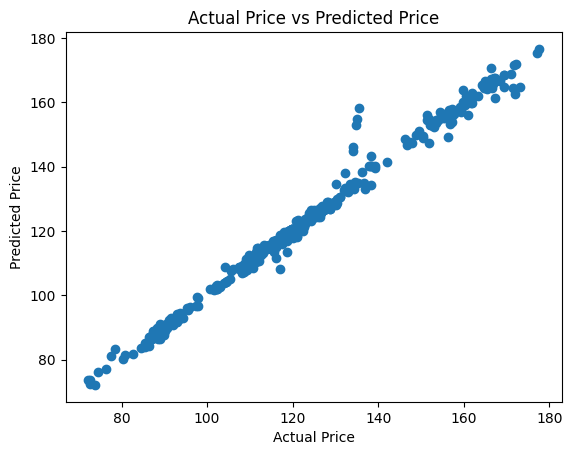

In [ ]:
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Text(0, 0.5, 'GLD Price')

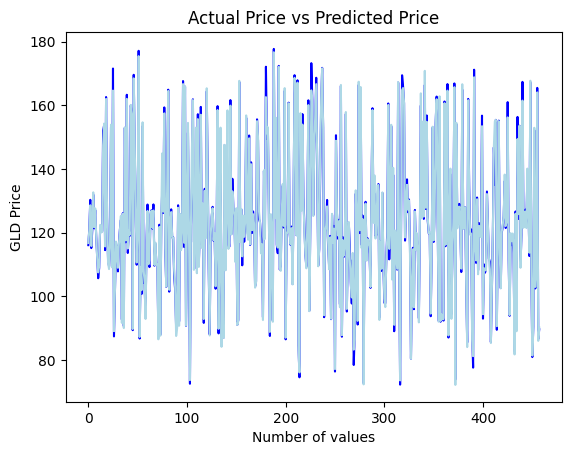

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_prediction, color='lightblue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')